In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3*x[:,0]**2 + 0.05 * np.random.randn(100)

In [61]:
import pandas as pd

In [62]:
df = pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y

In [63]:
df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'x vs y')

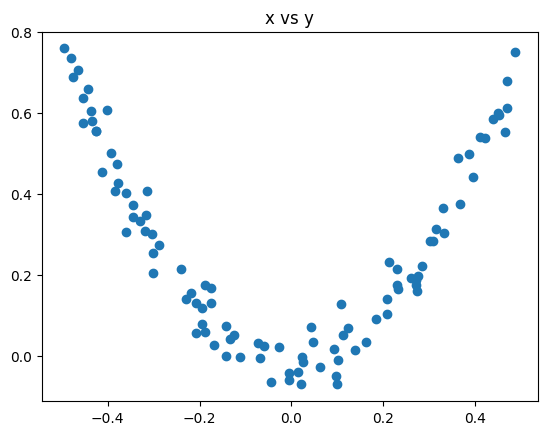

In [64]:
plt.scatter(df['x'], df['y'])
plt.title('x vs y')

In [65]:
df['pred1'] = df['y'].mean()

In [66]:
df

,x,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [67]:
df['res1'] = df['y'] - df['pred1']

In [68]:
df

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


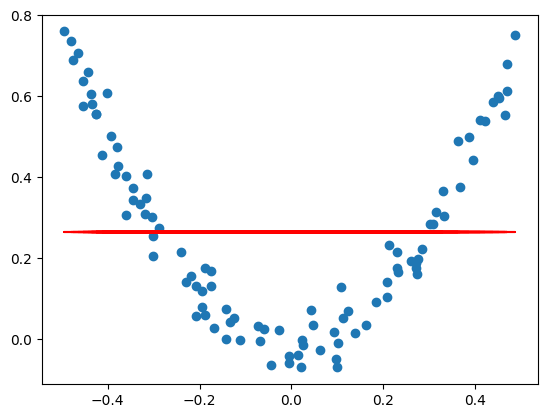

In [69]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['pred1'], color= 'red')

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
tree1 = DecisionTreeRegressor(max_leaf_nodes= 8)
tree1.fit(df['x'].values.reshape(100, 1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

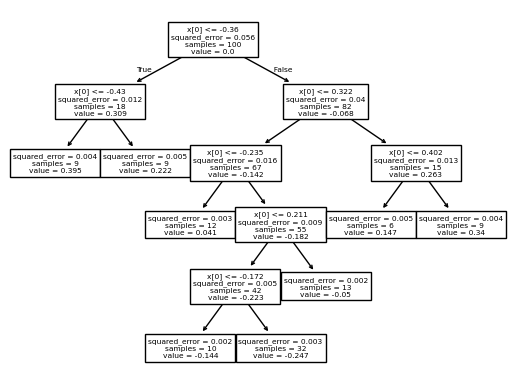

In [72]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [73]:
#generating x_test
x_test = np.linspace(-0.5,0.5,500)

In [74]:
y_pred = 0.2654 + tree1.predict(x_test.reshape(500, 1))

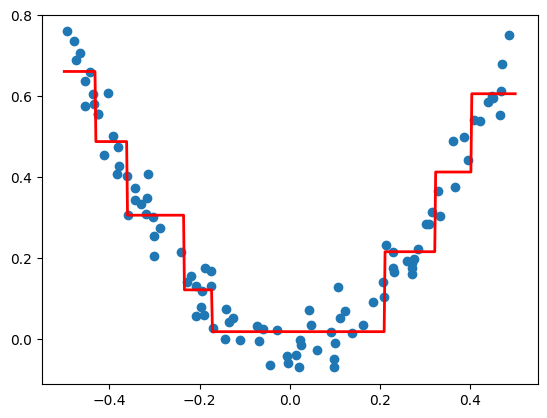

In [75]:
# plt.figure(figsize=(14,4))
# plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2, color= 'red')
plt.scatter(df['x'], df['y'])

In [76]:
df['pred2'] = 0.6254 + tree1.predict(df['x'].values.reshape(100,1))

In [77]:
df

,x,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.378261
1,0.450714,0.594480,0.265458,0.329021,0.965826
2,0.231994,0.166052,0.265458,-0.099407,0.575726
3,0.098658,-0.070178,0.265458,-0.335636,0.378261
4,-0.343981,0.343986,0.265458,0.078528,0.665906
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.378261
96,0.022733,-0.002305,0.265458,-0.267763,0.378261
97,-0.072459,0.032809,0.265458,-0.232650,0.378261
98,-0.474581,0.689516,0.265458,0.424057,1.020854


In [78]:
df['res2'] = df['y'] - df['pred2']

In [79]:
df

,x,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.378261,-0.326688
1,0.450714,0.594480,0.265458,0.329021,0.965826,-0.371346
2,0.231994,0.166052,0.265458,-0.099407,0.575726,-0.409674
3,0.098658,-0.070178,0.265458,-0.335636,0.378261,-0.448439
4,-0.343981,0.343986,0.265458,0.078528,0.665906,-0.321920
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.378261,-0.418936
96,0.022733,-0.002305,0.265458,-0.267763,0.378261,-0.380566
97,-0.072459,0.032809,0.265458,-0.232650,0.378261,-0.345453
98,-0.474581,0.689516,0.265458,0.424057,1.020854,-0.331338


In [80]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [81]:
tree2.fit(df['x'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [82]:
y_pred2 = 0.2654 + sum(regressor.predict(x_test.reshape(-1, 1)) for regressor in [tree1, tree2])

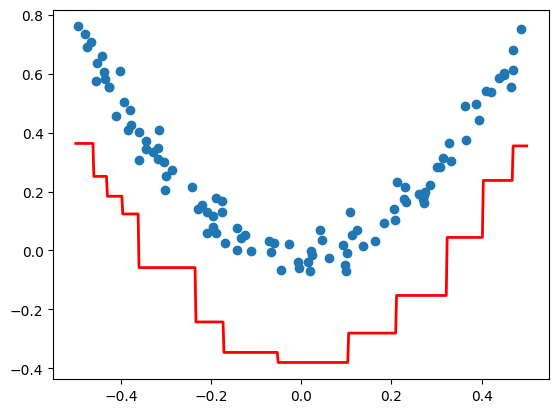

In [83]:

plt.plot(x_test, y_pred2, linewidth= 2, color= 'red')
plt.scatter(df['x'], df['y'])